In [9]:
# import and set options
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import scipy.stats as stats
import matplotlib as mpl
import utils
mpl.rcParams['pdf.fonttype'] = 42

## VAF correlation

Investigate if there is any correlation with Variant Allele Fraction (VAF) and identification of drivers by CHASM2.

In [2]:
# read mutations
mut_df = pd.read_table('data/aggregated_results/PANCAN.maf')

### VAF calculation

Compute the mean VAF for each cancer type

In [8]:
# compute mean VAF for each cancer type
mut_df['VAF'] = mut_df['t_alt_count'] / mut_df['t_depth']
vaf_vals = mut_df.groupby(['CODE', 'Tumor_Sample_Barcode'])['VAF'].mean()
vaf_vals_cancer_type = vaf_vals.mean(level='CODE')

### Read CHASM2 results

In [14]:
cancer_types = [os.path.basename(f)[:-4] for f in glob.glob('data/aggregated_results/*.txt') if 'PANCAN' not in f]
chasm2_dict = {c: utils.read_result(c, only_significant=True) for c in cancer_types}

### Driver prevalence

In [15]:
# calculate the driver prevalence per sample
driver_count = pd.Series({c: len(chasm2_dict[c]) for c in chasm2_dict})
total_samps = mut_df.groupby('CODE')['Tumor_Sample_Barcode'].nunique()
driver_per_sample = driver_count / total_samps

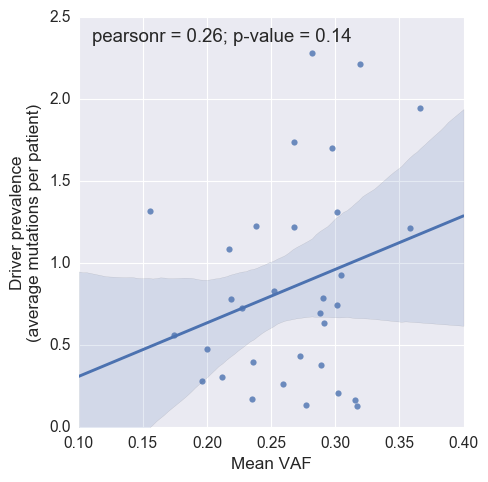

In [16]:
with sns.plotting_context('paper', font_scale=1.4):
    # plot correlation
    x, y = vaf_vals_cancer_type, driver_per_sample[vaf_vals_cancer_type.index]
    plot_df = pd.DataFrame({'x': x, 'y': y})
    corr, pval = stats.pearsonr(x, y)
    g = sns.lmplot('x', 'y', data=plot_df)

    # plot formatting
    ax = g.axes[0][0]
    ax.text(.11, 2.35, 'pearsonr = {0:.2f}; p-value = {1:.2g}'.format(corr, pval))
    ax.set_xlabel('Mean VAF')
    ax.set_ylabel('Driver prevalence\n(average mutations per patient)')
    ax.set_ylim(0, 2.5)
    
    # save plot
    plt.savefig('figures/corr_vaf_driver_prevalence.pdf')

### Number of unique drivers

In [23]:
# calculate the driver prevalence per sample
unique_drivers = pd.Series({c: len(chasm2_dict[c].drop_duplicates(['Hugo_Symbol', 'Transcript_ID', 'HGVSp_Short'])) for c in chasm2_dict})

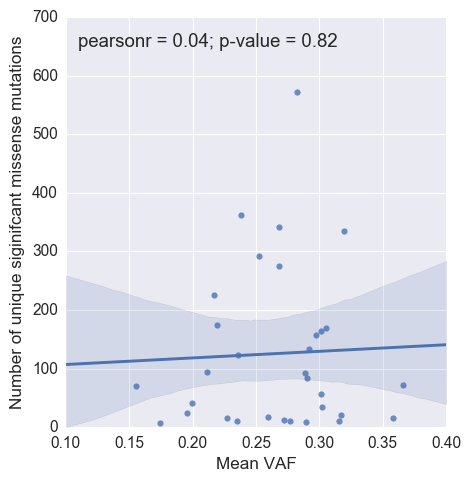

In [36]:
with sns.plotting_context('paper', font_scale=1.4):
    # plot correlation
    x, y = vaf_vals_cancer_type, unique_drivers[vaf_vals_cancer_type.index]
    plot_df = pd.DataFrame({'x': x, 'y': y})
    corr, pval = stats.pearsonr(x, y)
    g = sns.lmplot('x', 'y', data=plot_df)

    # plot formatting
    ax = g.axes[0][0]
    ax.text(.11, 650, 'pearsonr = {0:.2f}; p-value = {1:.2g}'.format(corr, pval))
    ax.set_xlabel('Mean VAF')
    ax.set_ylabel('Number of unique siginifcant missense mutations')
    ax.set_ylim(0, 700)
    
    # save plot
    plt.savefig('figures/corr_vaf_unique_drivers.pdf')

### Fraction of samples

In [26]:
num_samps = pd.Series({c: chasm2_dict[c]['Tumor_Sample_Barcode'].nunique() for c in chasm2_dict})
frac_samps = num_samps / total_samps

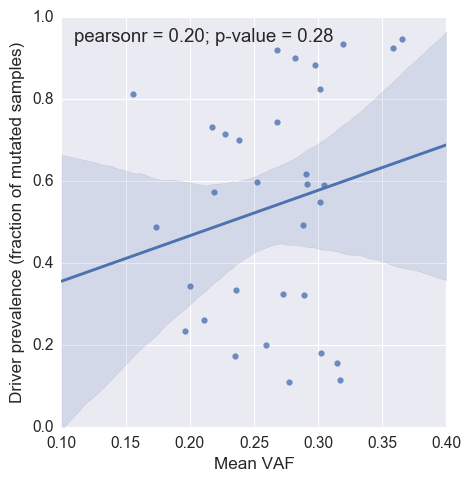

In [37]:
with sns.plotting_context('paper', font_scale=1.4):
    # plot correlation
    x, y = vaf_vals_cancer_type, frac_samps[vaf_vals_cancer_type.index]
    plot_df = pd.DataFrame({'x': x, 'y': y})
    corr, pval = stats.pearsonr(x, y)
    g = sns.lmplot('x', 'y', data=plot_df)

    # plot formatting
    ax = g.axes[0][0]
    ax.text(.11, .94, 'pearsonr = {0:.2f}; p-value = {1:.2g}'.format(corr, pval))
    ax.set_xlabel('Mean VAF')
    ax.set_ylabel('Driver prevalence (fraction of mutated samples)')
    ax.set_ylim(0, 1)
    
    # save plot
    plt.savefig('figures/corr_vaf_frac_samples.pdf')

### Normalized driver diversity

In [42]:
norm_ent = pd.read_table('data/normalized_driver_diversity.txt', header=None).set_index(0)[1]

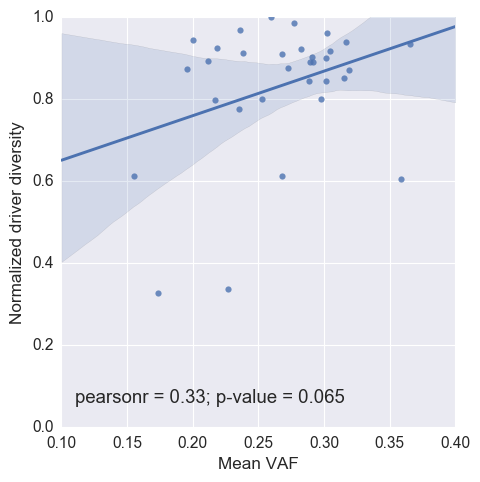

In [46]:
with sns.plotting_context('paper', font_scale=1.4):
    # plot correlation
    x, y = vaf_vals_cancer_type, norm_ent[vaf_vals_cancer_type.index]
    plot_df = pd.DataFrame({'x': x, 'y': y})
    corr, pval = stats.pearsonr(x, y)
    g = sns.lmplot('x', 'y', data=plot_df)

    # plot formatting
    ax = g.axes[0][0]
    ax.text(.11, .06, 'pearsonr = {0:.2f}; p-value = {1:.2g}'.format(corr, pval))
    ax.set_xlabel('Mean VAF')
    ax.set_ylabel('Normalized driver diversity')
    ax.set_ylim(0, 1)
    
    # save plot
    plt.savefig('figures/corr_vaf_driver_diversity.pdf')